In [ ]:
"""
https://kgptalkie.com/deep-learning-with-tensorflow-2-0-tutorial-getting-started-with-tensorflow-2-0-and-keras-for-beginners/
"""

In [27]:
import tensorflow as tf
from tensorflow import keras

# for building model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

# for predicting labels
from sklearn.metrics import accuracy_score

# python libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
"""
Here we are loading the fashion_mnist dataset from keras.
"""
mnist = keras.datasets.fashion_mnist

In [4]:
"""
Now we load the data into real variables using load_data().
It return 2 tuples.
The first tupes has the training data and the second tuple has the test data.
"""
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
"""
By using shape we can see that it has 60,000 images for training and each image is
of size 28×28 in X_train and a corresponding label for each image in y_train.
"""
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
"""
These are all the class name in their proper order.
top is encoded as 0, trouser is encoded as 1 and so on.
"""
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

### Data Exploration

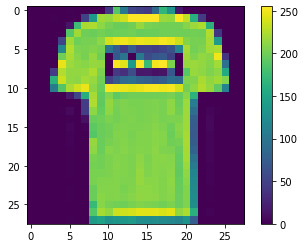

In [10]:
# creating a new figure
plt.figure()
# display data as an image
plt.imshow(X_train[1])
# add a colorbar to a plot
plt.colorbar()

In [11]:
"""
np.max() gives the maximum value. Hence the maximum value in X_train is 255.
"""
np.max(X_train)

255

In [12]:
"""
Neural Network model doesn’t take value greater than 1.
So we need to bring all the values between 0 and 1. 
To do this we will divide all the values in the training and testing dataset by 255
as the greatest value in our dataset is 255.
"""

X_train = X_train/255.0
X_test = X_test/255.0

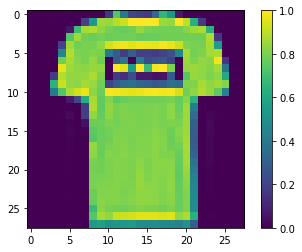

In [13]:
# creating a new figure
plt.figure()
# display data as an image
plt.imshow(X_train[1])
# add a colorbar to a plot
plt.colorbar()

### Build the model with TF 2.0

In [22]:
# Sequential means one input and one output
model = Sequential()
# converting the data into a 1-dimensional array for inputting it to the next layer
model.add(Flatten(input_shape = (28, 28)))
# relu removes the negative values (converting them to zero)
model.add(Dense(32, activation = 'relu'))
# The softmax function is a more generalized logistic activation function,
# which is used for multiclass classification.
model.add(Dense(10, activation = 'softmax'))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [24]:
"""
sparse_categorical_crossentropy - produces a category index of the most likely matching category.

Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent
procedure to update network weights iterative based in training data.
Adam is a popular algorithm in the field of deep learning because it achieves good results fast.
"""
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 793us/step - loss: 0.7628 - accuracy: 0.7467
Epoch 2/10
1875/1875 [==============================] - 1s 770us/step - loss: 0.4258 - accuracy: 0.8499
Epoch 3/10
1875/1875 [==============================] - 1s 773us/step - loss: 0.3851 - accuracy: 0.8619
Epoch 4/10
1875/1875 [==============================] - 1s 768us/step - loss: 0.3651 - accuracy: 0.8711
Epoch 5/10
1875/1875 [==============================] - 1s 767us/step - loss: 0.3497 - accuracy: 0.8751
Epoch 6/10
1875/1875 [==============================] - 1s 776us/step - loss: 0.3405 - accuracy: 0.8765
Epoch 7/10
1875/1875 [==============================] - 1s 769us/step - loss: 0.3250 - accuracy: 0.8839
Epoch 8/10
1875/1875 [==============================] - 1s 795us/step - loss: 0.3218 - accuracy: 0.8836
Epoch 9/10
1875/1875 [==============================] - 2s 938us/step - loss: 0.3111 - accuracy: 0.8867
Epoch 10/10
1875/1875 [==============================] - 2s 830u

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

313/313 [==============================] - 0s 643us/step - loss: 0.3723 - accuracy: 0.8675
0.8675000071525574


In [61]:
# predicting the hole set
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(accuracy_score(y_test, y_pred))
print(y_pred)

# predicting one or more pictures
print(np.argmax(model.predict(X_test[1:2])))

[9 2 1 ... 8 1 5]


array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.05098039, 0.2627451 , 0.        , 0.        , 0.        ,
         0.        , 0.19607843, 0.14901961, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.03137255, 0.47058824, 0.81960784,
         0.88627451, 0.96862745, 0.92941176, 1.        , 1.        ,
         1.        , 0.96862745, 0.93333333, 0.92156863, 0.6745098 ,
         0.28235294, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.5372549 , 0.9372549 , 0.98823529, 0.95294118,
         0.91764706, 0.89803922, 0.93333333, 0.95686275, 0.96470588,
         0.